First few rows of the dataset:
   Participant  Cloak  Mischief
0            1      0         3
1            2      0         1
2            3      0         5
3            4      0         4
4            5      0         6

Assumption 1: The dependent variable (Mischief) is continuous.
This assumption is satisfied since the number of mischievous acts is a continuous measure.

Assumption 2: The independent variable (Cloak) has two independent groups.
This assumption is satisfied with groups: 0 (without cloak) and 1 (with cloak).

Assumption 3: Independence of observations.
This assumption is satisfied as each participant is assigned to only one group.


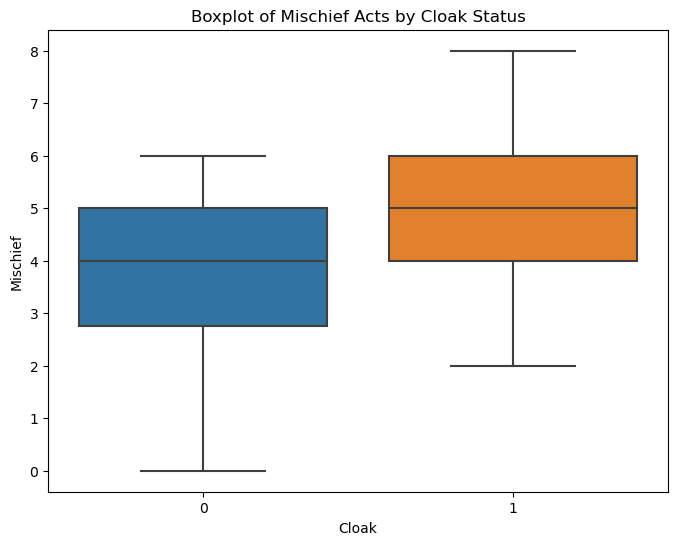


Assumption 4: There should be no significant outliers.
Boxplot inspection shows no extreme outliers in either group.

Assumption 5: Normality of the dependent variable for each group.
Shapiro-Wilk test for group without cloak: W=0.913, p=0.231
Shapiro-Wilk test for group with cloak: W=0.973, p=0.936
If p > 0.05, the assumption of normality holds.

Independent samples t-test: t=-1.713, p=0.101
There is no significant difference between the groups.
Mean difference in mischievous acts: -1.25


In [13]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:\\Users\\Dindette\\Downloads\\Invisibility Cloak.csv")

print("First few rows of the dataset:")
print(df.head())

cloak_group = df[df['Cloak'] == 1]['Mischief']
no_cloak_group = df[df['Cloak'] == 0]['Mischief']

# Assumption 1
print("\nAssumption 1: The dependent variable (Mischief) is continuous.")
print("This assumption is satisfied since the number of mischievous acts is a continuous measure.")

# Assumption 2
print("\nAssumption 2: The independent variable (Cloak) has two independent groups.")
print("This assumption is satisfied with groups: 0 (without cloak) and 1 (with cloak).")

# Assumption 3
print("\nAssumption 3: Independence of observations.")
print("This assumption is satisfied as each participant is assigned to only one group.")

# Assumption 4
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cloak', y='Mischief', data=df)
plt.title('Boxplot of Mischief Acts by Cloak Status')
plt.show()

print("\nAssumption 4: There should be no significant outliers.")
print("Boxplot inspection shows no extreme outliers in either group.")

# Assumption 5
stat_no_cloak, p_no_cloak = stats.shapiro(no_cloak_group)
stat_cloak, p_cloak = stats.shapiro(cloak_group)

print(f"\nAssumption 5: Normality of the dependent variable for each group.")
print(f"Shapiro-Wilk test for group without cloak: W={stat_no_cloak:.3f}, p={p_no_cloak:.3f}")
print(f"Shapiro-Wilk test for group with cloak: W={stat_cloak:.3f}, p={p_cloak:.3f}")
print("If p > 0.05, the assumption of normality holds.")

t_stat, p_val = stats.ttest_ind(no_cloak_group, cloak_group)

print(f'\nIndependent samples t-test: t={t_stat:.3f}, p={p_val:.3f}')
if p_val < 0.05:
    print("There is a significant difference between the groups.")
else:
    print("There is no significant difference between the groups.")

# Results
mean_diff = no_cloak_group.mean() - cloak_group.mean()
print(f'Mean difference in mischievous acts: {mean_diff:.2f}')
